开始训练
已经训练 100 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 0 0 2 0 0 1 0 0 1 0 0 2] 
真实值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 1 0 2 0 0 1 0 0 1 0 0 2] 
错误下标: [18]
已经训练 200 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 0 0 2 0 0 1 0 0 1 0 0 2] 
真实值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 1 0 2 0 0 1 0 0 1 0 0 2] 
错误下标: [18]
已经训练 300 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 0 0 2 0 0 1 0 0 1 0 0 2] 
真实值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 1 0 2 0 0 1 0 0 1 0 0 2] 
错误下标: [18]
已经训练 400 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 0 0 2 0 0 1 0 0 1 0 0 2] 
真实值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 1 0 2 0 0 1 0 0 1 0 0 2] 
错误下标: [18]
已经训练 500 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 0 0 2 0 0 1 0 0 1 0 0 2] 
真实值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 1 0 2 0 0 1 0 0 1 0 0 2] 
错误下标: [18]
已经训练 600 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 0 0 2 0 0 1 0 0 1 0 0 2] 
真实值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 2 0 2 1 0 2 0 0 1 0 0 1 0 0 2] 
错误下标: [18]
已经训练 700 轮
预测值: [1 1 0 2 1 2 0 1 2 1 0 0 2 0 2 

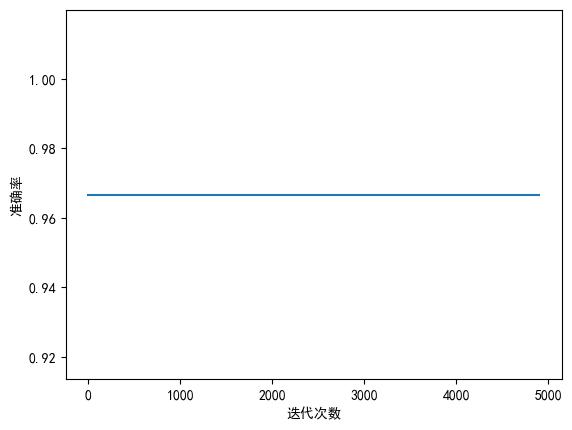

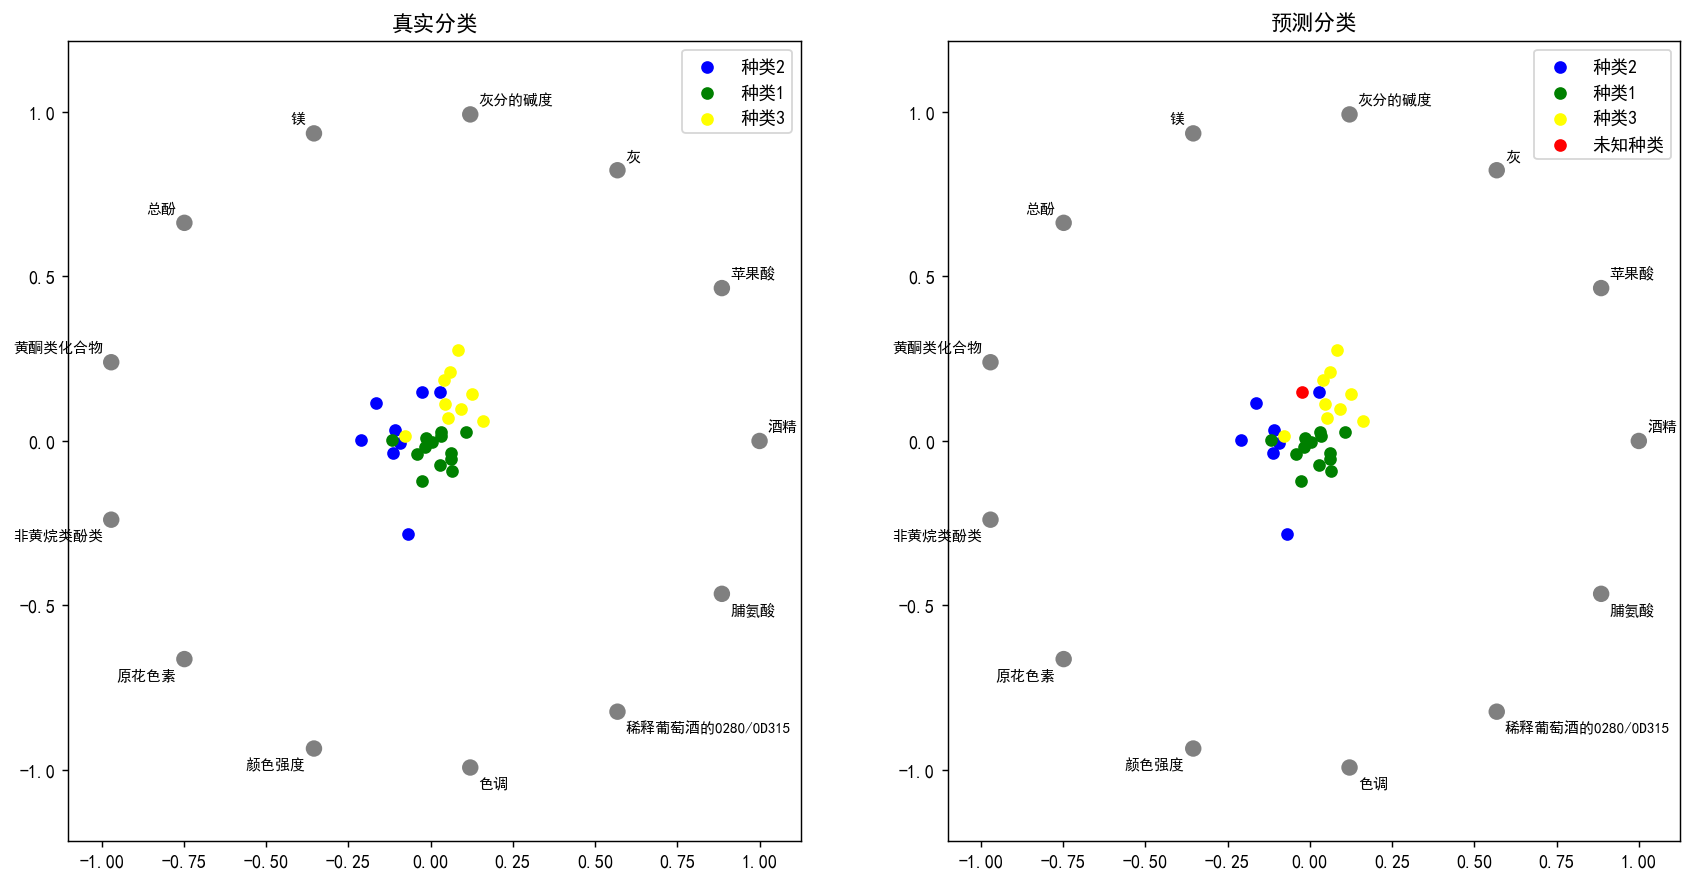

In [1]:

#wine集预测
import time

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import radviz
from sklearn import preprocessing
from Annclass import  *
# 特征有4个维度，类别有1个维度，一共5个维度，故采用了RadViz图
def result_visualization(test_datas, test_labels, labels_pred, accuracy,epochs):

    cols = test_labels.shape[0]
    class_true = []
    class_pred = []

    labels_true = np.argmax(test_labels, axis=1)
    # 反转换类别的独热编码
    for i in range(cols):
        if labels_true[i] == 2:
            class_true.append('种类3')
        elif labels_true[i] == 1:
            class_true.append('种类2')
        else:
            class_true.append('种类1')
    for j in range(cols):
        if labels_pred[j] == 2:
            class_pred.append('种类3')
        elif labels_pred[j] == 1:
            class_pred.append('种类2')
        elif labels_pred[j] == 0:
            class_pred.append('种类1')
        else:
            class_pred.append('未知种类')

    # 将特征和类别矩阵拼接起来
    real = np.column_stack((test_datas, class_true))
    pred = np.column_stack((test_datas, class_pred))
    print(real)
    df_real = pd.DataFrame(real, index=None,
                           columns=['酒精', '苹果酸', '灰', '灰分的碱度','镁','总酚','黄酮类化合物','非黄烷类酚类','原花色素','颜色强度','色调','稀释葡萄酒的0280/0D315','脯氨酸','种类'])
    df_pred = pd.DataFrame(pred, index=None,
                           columns=['酒精', '苹果酸', '灰', '灰分的碱度','镁','总酚','黄酮类化合物','非黄烷类酚类','原花色素','颜色强度','色调','稀释葡萄酒的0280/0D315','脯氨酸','种类'])

    print(df_real)
    df_real[['酒精', '苹果酸', '灰', '灰分的碱度','镁','总酚','黄酮类化合物','非黄烷类酚类','原花色素','颜色强度','色调','稀释葡萄酒的0280/0D315','脯氨酸']] = df_real[
        ['酒精', '苹果酸', '灰', '灰分的碱度','镁','总酚','黄酮类化合物','非黄烷类酚类','原花色素','颜色强度','色调','稀释葡萄酒的0280/0D315','脯氨酸']].astype(float)
    df_pred[['酒精', '苹果酸', '灰', '灰分的碱度','镁','总酚','黄酮类化合物','非黄烷类酚类','原花色素','颜色强度','色调','稀释葡萄酒的0280/0D315','脯氨酸']] = df_pred[
        ['酒精', '苹果酸', '灰', '灰分的碱度','镁','总酚','黄酮类化合物','非黄烷类酚类','原花色素','颜色强度','色调','稀释葡萄酒的0280/0D315','脯氨酸']].astype(float)

    # 绘图
    # 绘制迭代损失图像
    plt.figure("损失图像")
    plt.plot(np.arange(1, epochs, 100), accuracy)
    plt.ylabel('准确率')
    plt.xlabel('迭代次数')

    # 绘制分类图
    plt.figure(dpi=130, figsize=(16, 8))
    plt.subplot(1, 2, 1)
    radviz(df_real, '种类', color=['blue', 'green', 'yellow', 'red'])
    plt.title('真实分类')
    plt.subplot(1, 2, 2)
    radviz(df_pred, '种类', color=['blue', 'green', 'yellow', 'red'])
    plt.title('预测分类')
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()

def wine_pred():
    # 初始化参数
    inputSize=13             # 输入层
    hidSize = 10            # 隐藏层
    outputSize = 3          # 输出层
    learning_rate = 0.001    # 学习率
    epochs = 5000         # 训练轮数
    accuracy = []           # 准确率
    # 生成ann模型
    ann = Ann(inputSize, hidSize, outputSize, learning_rate)

    # 加载训练数据集
    data_set_path = "data\wine_training.csv"
    data_set = pd.read_csv(data_set_path, header=None)
    train_datas = data_set.iloc[:, 0:inputSize].values
    train_labels = data_set.iloc[:, inputSize:].values
    train_datas = (train_datas - np.mean(train_datas, axis=0)) / np.std(train_datas, axis=0)

    # 加载测试数据集
    data_test_path = "data\wine_test.csv"
    data_test_set = pd.read_csv(data_test_path, header=None)
    test_datas = data_test_set.iloc[:, 0:inputSize].values
    test_labels = data_test_set.iloc[:, inputSize:].values
    test_datas = (test_datas - np.mean(test_datas, axis=0)) / np.std(test_datas, axis=0)
    labels_pred = []  # 预测类别集合
    error_index = []  # 预测错误类别集合
    print("开始训练")
    s = time.time()
    for epoch in range(epochs):
        if (epoch + 1) % 100 == 0:
            print("已经训练 %d 轮" % (epoch + 1))
            acc, labels_pred, labels_true, error_index = ann.accuracy(test_datas, test_labels)
            print('预测值:', labels_pred, '\n真实值:', labels_true, '\n错误下标:', error_index)
            accuracy.append(acc)
        for i in range(len(train_datas)):
            ann.train(train_datas[i], train_labels[i])
    f = time.time()
    print("第%d轮训练结束" % (epoch + 1))
    print("当前准确率：", accuracy[-1])
    print("错误下标：", error_index)
    print("耗时：", f - s, 's')
    #处理未正确分类的数据，为后续画图做准备
    for i in error_index:
        #表示预测错误
        labels_pred[i]=-1
    #特征有4个维度，类别有1个维度，一共五个维度，故采用了RadViz图
    result_visualization(test_datas, test_labels, labels_pred, accuracy,epochs)


wine_pred()

开始训练
已经训练 100 轮
预测值: [2 2 1 1 0 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
真实值: [2 2 1 1 0 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
错误下标: [13]
已经训练 200 轮
预测值: [2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 1 2] 
真实值: [2 2 1 1 0 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
错误下标: [ 2  5  7  8  9 11 12 15 17 24 29]
已经训练 300 轮
预测值: [2 2 1 1 0 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
真实值: [2 2 1 1 0 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
错误下标: [13]
已经训练 400 轮
预测值: [2 2 1 1 0 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
真实值: [2 2 1 1 0 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
错误下标: [13]
已经训练 500 轮
预测值: [2 2 1 1 0 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
真实值: [2 2 1 1 0 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
错误下标: [13]
已经训练 600 轮
预测值: [1 1 1 1 0 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 2 0 0 2 1 0 0 0 1 1] 
真实值: [2 2 1 1 0 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 0 0 2 1 0 0 0 1 1] 
错误下标: [ 0  1 13 16]
已经训练 700

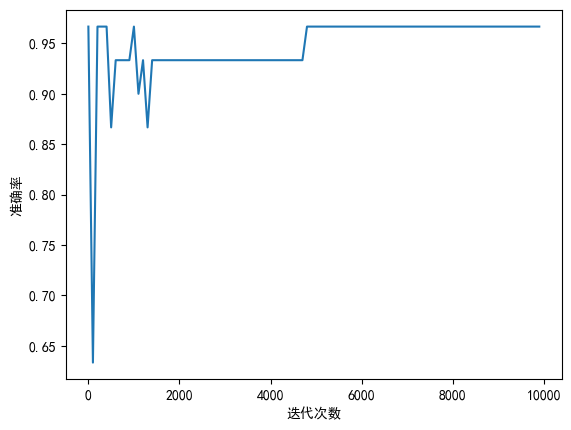

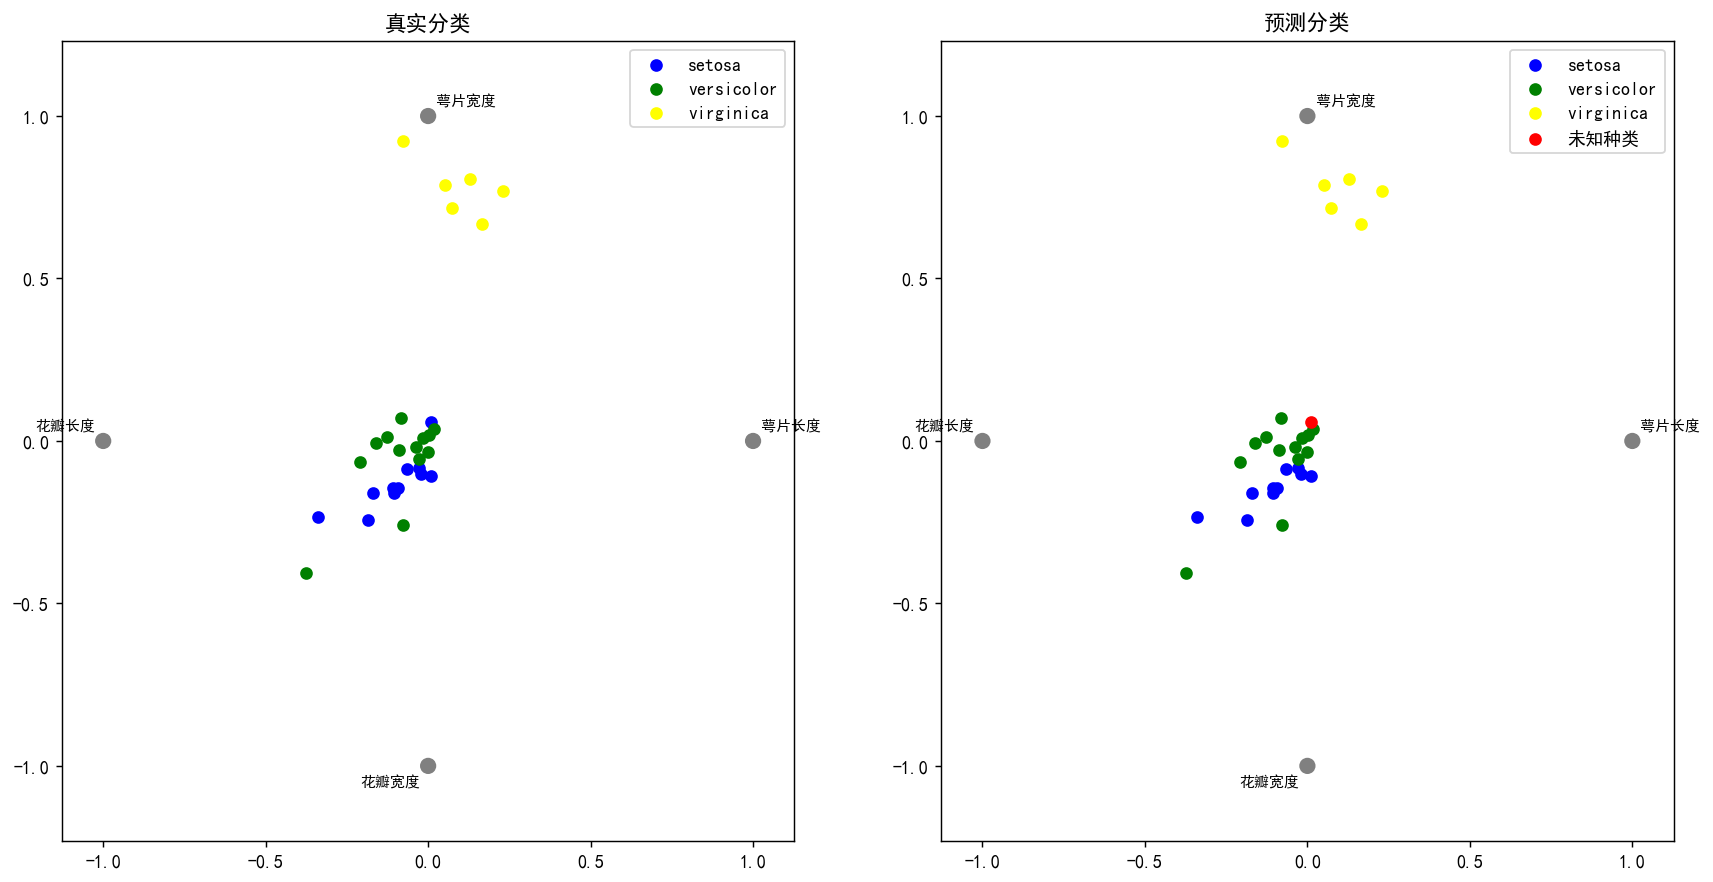

In [3]:
#鸢尾花集预测
import time

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import radviz
from Annclass import  *


# 特征有4个维度，类别有1个维度，一共5个维度，故采用了RadViz图
def result_visualization(test_datas, test_labels, labels_pred, accuracy,epochs):

    cols = test_labels.shape[0]
    class_true = []
    class_pred = []

    labels_true = np.argmax(test_labels, axis=1)
    # 反转换类别的独热编码
    for i in range(cols):
        if labels_true[i] == 2:
            class_true.append('setosa')
        elif labels_true[i] == 1:
            class_true.append('versicolor')
        else:
            class_true.append('virginica')
    for j in range(cols):
        if labels_pred[j] == 2:
            class_pred.append('setosa')
        elif labels_pred[j] == 1:
            class_pred.append('versicolor')
        elif labels_pred[j] == 0:
            class_pred.append('virginica')
        else:
            class_pred.append('未知种类')

    # 将特征和类别矩阵拼接起来
    real = np.column_stack((test_datas, class_true))
    pred = np.column_stack((test_datas, class_pred))

    df_real = pd.DataFrame(real, index=None,
                           columns=['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '种类'])
    df_pred = pd.DataFrame(pred, index=None,
                           columns=['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '种类'])

    print(df_real)
    df_real[['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度']] = df_real[
        ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度']].astype(float)
    df_pred[['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度']] = df_pred[
        ['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度']].astype(float)

    # 绘图
    # 绘制迭代损失图像
    plt.figure("损失图像")
    plt.plot(np.arange(1, epochs, 100), accuracy)
    plt.ylabel('准确率')
    plt.xlabel('迭代次数')

    # 绘制分类图
    plt.figure(dpi=130, figsize=(16, 8))
    plt.subplot(1, 2, 1)
    radviz(df_real, '种类', color=['blue', 'green', 'yellow', 'red'])
    plt.title('真实分类')
    plt.subplot(1, 2, 2)
    radviz(df_pred, '种类', color=['blue', 'green', 'yellow', 'red'])
    plt.title('预测分类')
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()
def iris_pred():
    # 初始化参数
    inputSize=4             # 输入层
    hidSize = 8            # 隐藏层
    outputSize = 3          # 输出层
    learning_rate = 0.002    # 学习率
    epochs = 10000          # 训练轮数
    accuracy = []           # 准确率
    # 生成ann模型
    ann = Ann(inputSize, hidSize, outputSize, learning_rate)
    # 加载训练数据集
    data_set_path = "data\iris_training.csv"
    data_set = pd.read_csv(data_set_path, header=None)
    train_datas = data_set.iloc[:, 0:inputSize].values
    train_labels = data_set.iloc[:, inputSize:].values
    # 加载测试数据集
    data_test_path = "data\iris_test.csv"
    data_test_set = pd.read_csv(data_test_path, header=None)
    test_datas = data_test_set.iloc[:, 0:inputSize].values
    test_labels = data_test_set.iloc[:, inputSize:].values
    labels_pred = [] # 预测类别集合
    error_index = [] # 预测错误类别集合
    print("开始训练")
    s = time.time()
    for epoch in range(epochs):
        if (epoch+1) % 100 == 0:
            print("已经训练 %d 轮" % (epoch+1))
            acc, labels_pred, labels_true, error_index = ann.accuracy(test_datas, test_labels)
            print('预测值:', labels_pred, '\n真实值:', labels_true, '\n错误下标:', error_index)
            accuracy.append(acc)
        for i in range(len(train_datas)):
            ann.train(train_datas[i], train_labels[i])
    f = time.time()
    print("第%d轮训练结束" % (epoch+1))
    print("当前准确率：", accuracy[-1])
    print("错误下标：", error_index)
    print("耗时：", f-s, 's')
    #处理未正确分类的数据，为后续画图做准备
    for i in error_index:
        #表示预测错误
        labels_pred[i]=-1
    #特征有4个维度，类别有1个维度，一共五个维度，故采用了RadViz图
    result_visualization(test_datas, test_labels, labels_pred, accuracy,epochs)
iris_pred()
